<a href="https://colab.research.google.com/github/urbnzazo25/MLDL22-23/blob/main/Lab1/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [5]:
# !git clone https://github.com/urbnzazo25/MLDL22-23.git

In [1]:
import sklearn
from sklearn.datasets import load_digits, load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd

In [7]:
X, y = load_digits(return_X_y=True)

In [8]:
X[0].shape

(64,)

In [9]:
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, shuffle=True, stratify=y)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
regressor = LogisticRegression(solver='lbfgs')
regressor.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [14]:
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1 score: {f1}")

Precision: 0.9531465299886354
Recall: 0.9527777777777777
F1 score: 0.9528539098620133


### Ex 1

In [15]:
iris = load_iris()
#X = iris.data
y1 = iris.target

In [16]:
print(y)

[0 1 2 ... 8 9 8]


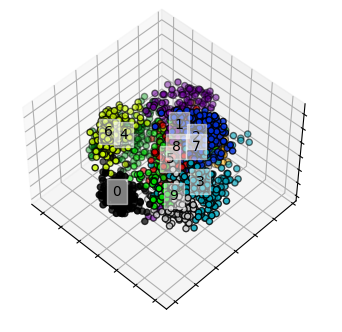

In [17]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [18]:
X1 = scaler.fit_transform(X)
cov = np.cov(X1, rowvar=False)

In [19]:
w, v = np.linalg.eig(cov)

In [20]:
idx = np.argsort(w)[::-1]

In [21]:
v = v[:, idx]

In [22]:
X_pca = X1 @ v[:, [i for i in range(0, 15)]]

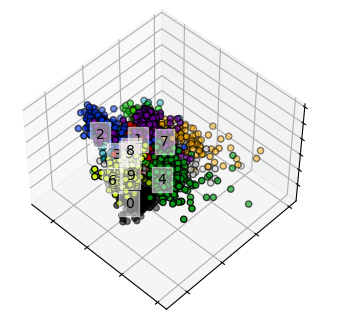

In [23]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

### Ex 2

In [24]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [25]:
import sys
sys.path.append(r'fashion-mnist\utils')
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [26]:
n = 6
scaler = MaxAbsScaler()
X_t = scaler.fit_transform(X_train)
X_t = PCA(n_components=n).fit_transform(X_t)

In [27]:
idx = np.where(y_train == 0)[0]

In [28]:
X_t, y_t = X_t[idx, :], y_train[idx]

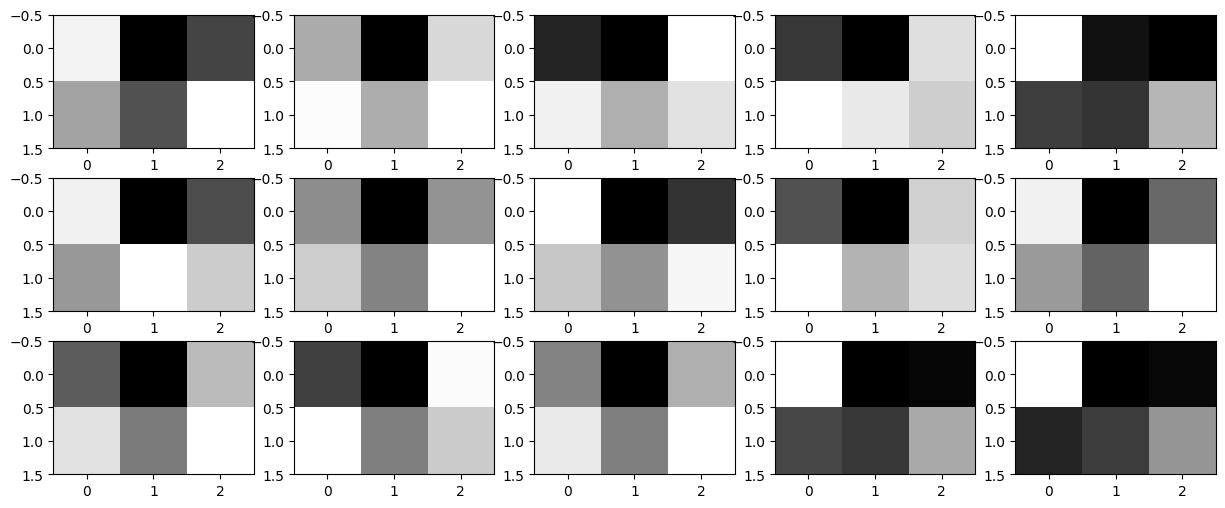

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
sample = X_t[np.random.choice(X_t.shape[0], 15, replace=False), :]
for i, ax in enumerate(axs.flat):
    ax.imshow(sample[i,:].reshape(2, 3), cmap='gray')

##### Now last six eigenvalues

In [30]:
X_t = scaler.fit_transform(X_train)

In [31]:
cov = np.cov(X_t, rowvar=False)
w, v = np.linalg.eig(cov)

In [32]:
idx = np.argsort(w)
v = v[:, idx]

In [33]:
X_pca = X_t @ v[:, [i for i in range(0, 6)]]

In [34]:
idx0 = np.where(y_train == 0)[0]

In [35]:
X_pca, y_t = X_pca[idx0, :], y_train[idx0]

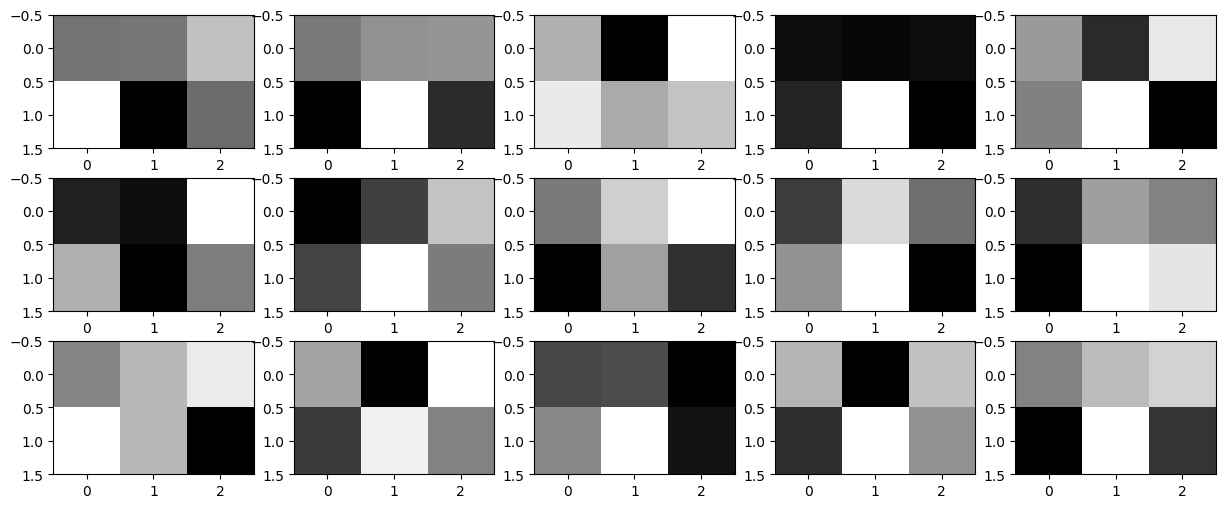

In [36]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
sample = X_pca[np.random.choice(X_pca.shape[0], 15, replace=False), :]
for i, ax in enumerate(axs.flat):
    ax.imshow(sample[i,:].reshape(2, 3), cmap='gray')

### Ex 3

In [2]:
import torch
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)
y.sub_(x)
print(y)
z = x.reshape(4, -1)
z

tensor([[0.0500, 0.4346],
        [0.0764, 0.5678]])
tensor([[0.9916, 0.4464],
        [0.1508, 0.0701]])
tensor([[ 0.9416,  0.0119],
        [ 0.0744, -0.4977]])


tensor([[0.0500],
        [0.4346],
        [0.0764],
        [0.5678]])

In [50]:
a = torch.tensor([1., 2., 3.])
b = torch.ones(3, 1)*2

In [52]:
torch.matmul(a, b)

tensor([12.])

### Ex 4

In [3]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [4]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 4

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [15]:
path  = './cifar-10-batches-py/'
fp = path + 'data_batch_1'
db = unpickle(fp)
data = db[b'data']
label = db[b'labels']

In [12]:
d = data[0,:]
r = d[:1024].reshape(1024, 1)
g = d[1024:2048].reshape(1024, 1)
b = d[2048:].reshape(1024, 1)
d = np.hstack((r, g, b))
r = d.reshape(32, 32, 3)

In [16]:
class DatasetCIFAR10(Dataset):
    def __init__(self, path, train=True, transform=None):
        super().__init__()
        if train:
            for i in range(1, 6):
                fp = path + f'data_batch_{i}'
                db = unpickle(fp)
                data = np.array(db[b'data'])
                labels = np.array(db[b'labels']).reshape(data.shape[0], 1)
                dataset = np.concatenate([labels, data], axis=1)
                if i == 1:
                    self.data = dataset
                else:
                    self.data = np.concatenate([self.data, dataset])
        else:
            fp = path + 'test_batch'
            db = unpickle(fp)
            data = np.array(db[b'data'])
            labels = np.array(db[b'labels']).reshape(data.shape[0], 1)
            self.data = np.concatenate([labels, data], axis=1)
        self.transform = transform
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        image = self.data[index, 1:]
        r = image[:1024].reshape(1024, 1)
        g = image[1024:2048].reshape(1024, 1)
        b = image[2048:].reshape(1024, 1)
        image = np.hstack((r, g, b))
        image = image.reshape(32, 32, 3)
        label = self.data[index, 0]
        if self.transform:
            return self.transform(image), label
        return image.reshape(3, 32, 32), label

In [17]:
train_data = DatasetCIFAR10(path, train=True, transform=transform)
test_data = DatasetCIFAR10(path, train=False, transform=transform)

In [18]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)